# Importing the necessary libraries

In [1]:
# Importing the necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt


# Defining our data set

In [2]:
# Creating our data set
data = [0, 65, 25, 0, 25, 35, 50, 36, 44, 170, 87, 96, 100, 65, 48]

# Since we are always using 500 as the number of bootstrap samples wanted, define a variable
B = 500


# Defining a function that will give us the confidence intervals based on both the percentile method and bootstrap-t method

In [3]:
def bootstrap(data, B, alpha):
    # Calculating the mean of our original sample
    sample_mean = sum(data)/len(data)
    # Calculating the standard error of our original sample
    sample_var = sum([(values - sample_mean)**2 for values in data])/(len(data) - 1)
    sample_std_err = math.sqrt(sample_var/len(data))
    # Creating an array that will store the value of the estimator
    estimates = []
    # Creating an array that will store the T test statistics
    T = []
    # Obtaining B bootstrap samples
    for i in range(B):
        # Creating an array which will store the bootstrap sample
        boot = []
        for j in range(len(data)):
            # Define a variable that will give a random index to pull from for sampling with replacement
            index = np.random.randint(len(data))
            # Obtaining a bootstrap sample with replacement
            boot.append(data[index])
        # Appending the estimate for the current bootstrap sample to the array estimates
        estimates.append(sum(boot)/len(boot))
        # Calculating the sample variance
        var = sum([(values - estimates[i])**2 for values in boot])/(len(boot) - 1)
        # Calculating the standard error
        std_err = math.sqrt(var/len(boot))
        # Calculating the T test statistic
        T.append((estimates[i] - sample_mean)/std_err)
    
    # Ranking the estimates
    estimates.sort()
    
    # Calculating the lower and upper bound indices for the confidence interval
    lower = math.floor(B * alpha/2) + 1
    upper = math.floor(B * (1 - alpha/2)) + 1
    
    # Putting the confidence interval together so it can be returned as a tuple
    confidence_interval = (estimates[lower], estimates[upper])
    
    # Ranking the T test statistics
    T.sort()
    
    # Using percentile method to find indices for t values
    upper_t = math.floor(B * alpha/2) + 1
    lower_t = math.floor(B * (1 - alpha/2)) + 1
    
    # Defining the correct t values
    t_lower = T[lower_t]
    t_upper = T[upper_t]
    
    # Finding the confidence interval
    lower_bound = sample_mean - t_lower*sample_std_err
    upper_bound = sample_mean - t_upper*sample_std_err
    confidence_interval_t = (lower_bound, upper_bound)
    
    return confidence_interval, confidence_interval_t


# Obtaining the confidence intervals

In [4]:
print("The mean of the data set is: " + str(sum(data)/len(data)))

The mean of the data set is: 56.4


In [5]:
# Obtaining the 90% confidence interval by the percentile method
CI_p, CI_t = bootstrap(data, B, 0.1)
print("The confidence interval obtained with the percentile method is: " + str(CI_p))
print("The confidence interval obtained with the bootstrap-t method is: " + str(CI_t))


The confidence interval obtained with the percentile method is: (40.6, 75.86666666666666)
The confidence interval obtained with the bootstrap-t method is: (38.42676993891435, 79.42093766874939)


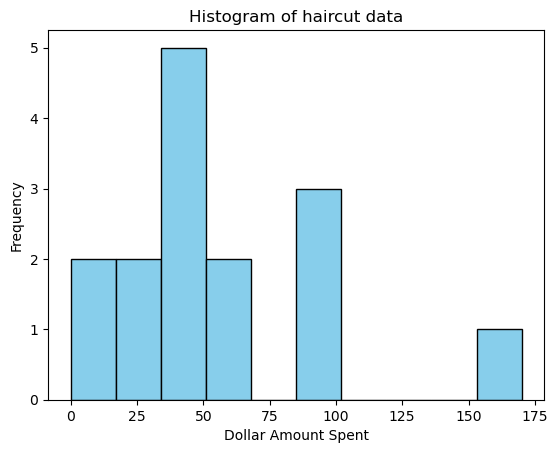

In [6]:
plt.figure(1)
plt.hist(data, color='skyblue', edgecolor='black')
# Adding title, x label, and y label
plt.title('Histogram of haircut data')
plt.xlabel('Dollar Amount Spent')
plt.ylabel('Frequency')
plt.show()

# Prototyping Functions

In [ ]:
# Function definition for the percentile method
def percentile(data, B, alpha):
    # Creating an array that will store the value of the estimator
    estimates = []
    # Obtaining B bootstrap samples
    for i in range(B):
        # Creating an array which will store the bootstrap sample
        boot = []
        for j in range(len(data)):
            # Define a variable that will give a random index to pull from for sampling with replacement
            index = np.random.randint(len(data))
            # Obtaining a bootstrap sample with replacement
            boot.append(data[index])
        # Appending the estimate for the current bootstrap sample to the array estimates
        estimates.append(sum(boot)/len(boot))
    
    # Ranking the estimates
    estimates.sort()
    
    # Calculating the lower and upper bound indices for the confidence interval
    lower = math.floor(B * alpha/2) + 1
    upper = math.floor(B * (1 - alpha/2)) + 1
    
    # Putting the confidence interval together so it can be returned as a tuple
    confidence_interval = (estimates[lower], estimates[upper])
    
    return confidence_interval



In [ ]:
# Defining a function for the bootstrap - t method
def bootstrap_t(data, B, alpha):
    # Calculating the mean of our original sample
    sample_mean = sum(data)/len(data)
    # Calculating the standard error of our original sample
    sample_var = sum([(values - sample_mean)**2 for values in data])/(len(data) - 1)
    sample_std_err = math.sqrt(sample_var/len(data))
    # Creating an array that will store the value of the estimator
    estimates = []
    # Creating an array that will store the T test statistics
    T = []
    # Obtaining B bootstrap samples
    for i in range(B):
        # Creating an array which will store the bootstrap sample
        boot = []
        for j in range(len(data)):
            # Define a variable that will give a random index to pull from for sampling with replacement
            index = np.random.randint(len(data))
            # Obtaining a bootstrap sample with replacement
            boot.append(data[index])
        # Appending the estimate for the current bootstrap sample to the array estimates
        estimates.append(sum(boot)/len(boot))
        # Calculating the sample variance
        var = sum([(values - estimates[i])**2 for values in boot])/(len(boot) - 1)
        # Calculating the standard error
        std_err = math.sqrt(var/len(boot))
        # Calculating the T test statistic
        T.append((estimates[i] - sample_mean)/std_err)
    
    # Ranking the T test statistics
    T.sort()
    
    # Using percentile method to find indices for t values
    upper = math.floor(B * alpha/2) + 1
    lower = math.floor(B * (1 - alpha/2)) + 1
    
    # Defining the correct t values
    t_lower = T[lower]
    t_upper = T[upper]
    
    # Finding the confidence interval
    lower_bound = sample_mean - t_lower*sample_std_err
    upper_bound = sample_mean - t_upper*sample_std_err
    confidence_interval = (lower_bound, upper_bound)
    
    return confidence_interval
    
    

In [ ]:
# Obtaining the 90% confidence interval by the percentile method
CI = percentile(data, B, 0.1)
print(CI)

# Obtaining the 90% confidence interval by the bootstrap-t method
confidence_t = bootstrap_t(data, B, 0.1)
print(confidence_t)
